In [28]:
from manim import *
#Global variable with H coin and T coin used throughout
H = LabeledDot(Tex("H", color=BLACK), radius=0.35, color=BLUE).scale(1.5)
T = LabeledDot(Tex("T", color=BLACK), radius=0.35, color=YELLOW).scale(1.5)
empty_coin = LabeledDot(Tex("$T$", color=BLACK), radius=0.35, color=BLACK).scale(1.5)   


def set_target_location(A,B):
    A.target.set_x(B.get_x())
    A.target.set_y(B.get_y())

def animate_flip(coin,final='H',n_flips=1,side_H = None, side_T = None):
    #RETURNS a list of animations that animate the mobject "coin" being flipped
    #The "final" variable incidicates what you want it to be at the end of the flipping
    #To animate a coin, use a loop to play the animations:
    
    # for a in animate_flip(coins[i],coin_flips[i]):
    #            self.play(a,run_time=0.2)
    
    global H,T
    
    if side_H == None:
        side_H = H
    
    if side_T == None:
        side_T = T
    
    full_fc = [side_H.copy().move_to(coin.get_center()),side_T.copy().move_to(coin.get_center())]
    anim_list = []
    for i in range(2):
        coin.generate_target()
        coin.target.stretch(0.01,dim=1)
        #coin.target.color = BLACK
        anim_list.append(MoveToTarget(coin))

        coin.color = BLACK
        coin.generate_target()

        offset = 1 if final=='H' else 0 #Ensures the coin lands on the side requested
        coin.target = full_fc[ (i+offset) % 2]

        anim_list.append(MoveToTarget(coin))
    return anim_list*n_flips

# Thumbnail

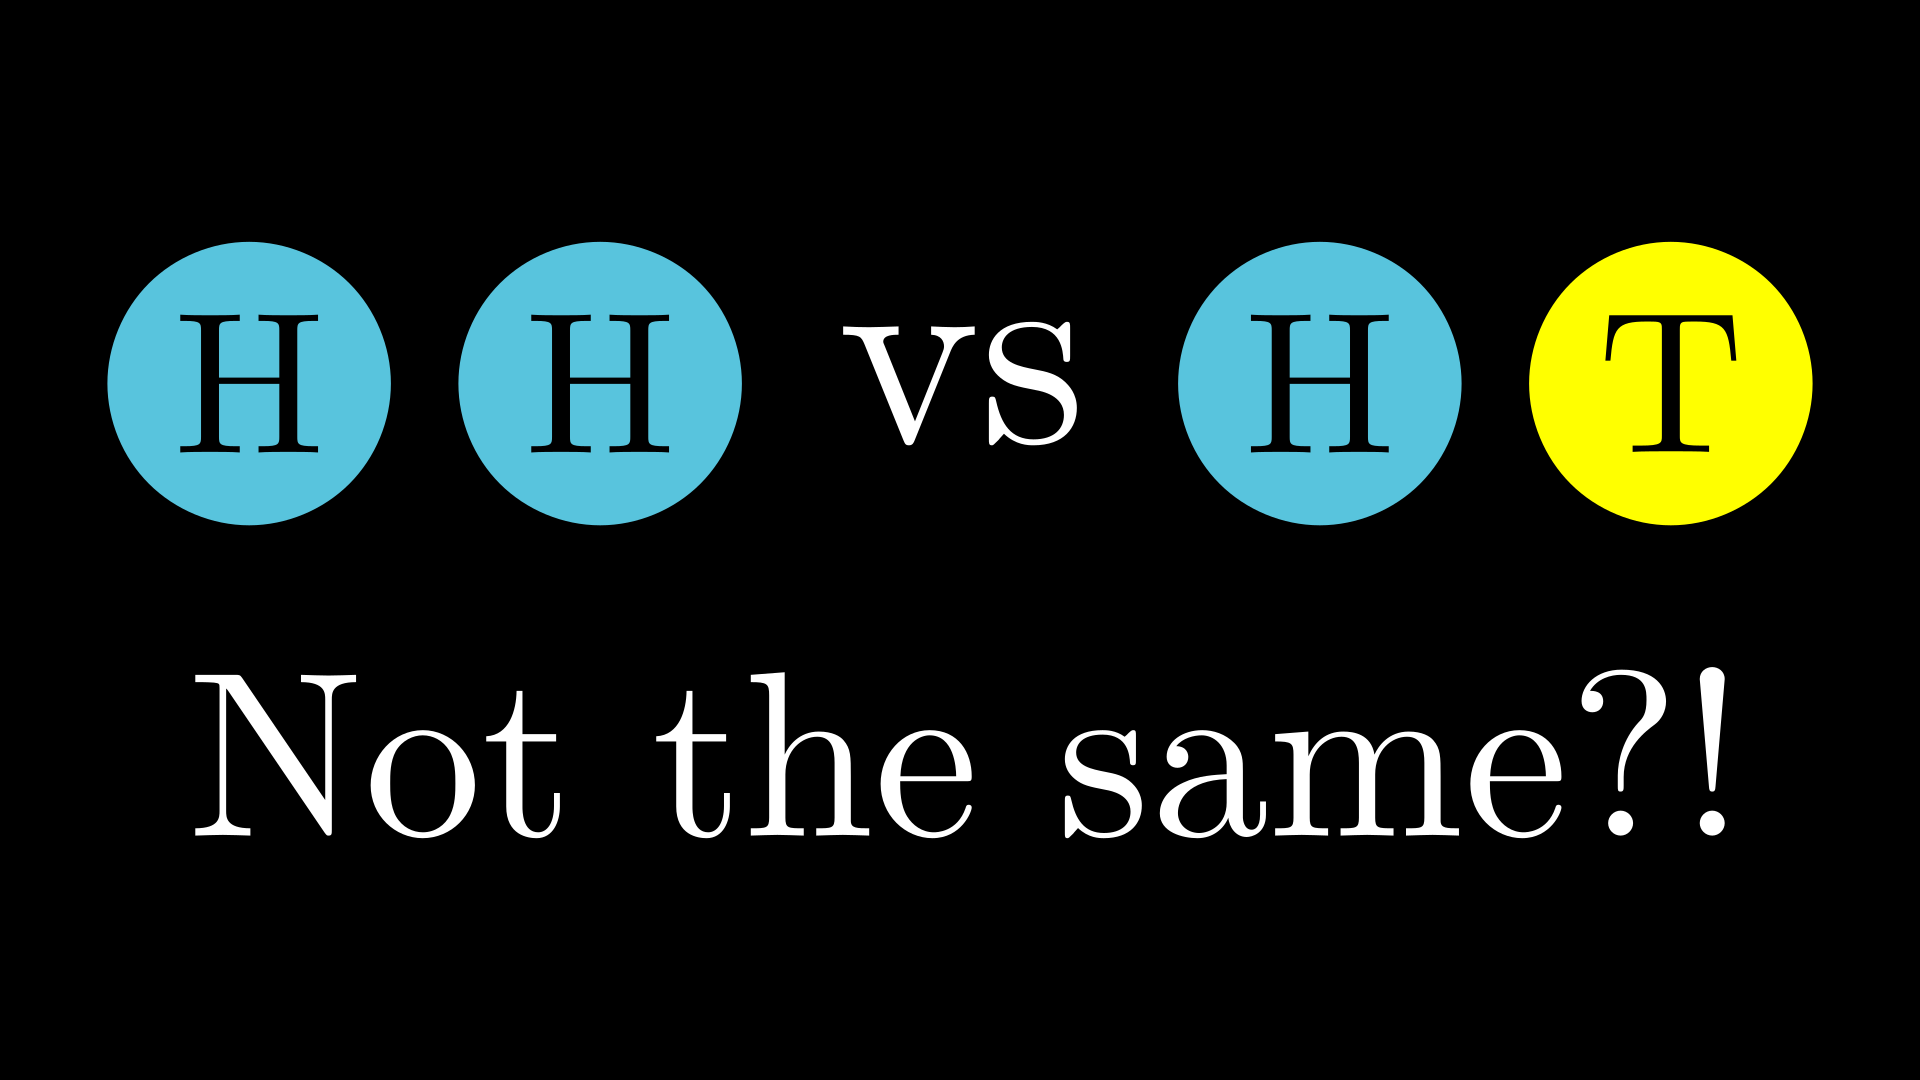

In [161]:
%%manim -v CRITICAL thumbnail
class thumbnail(Scene):
    def construct(self):
        
        coin_scale = 1
        
        #VGroup(Tex("takes \emph{longer} than"),Tex("(on average)")).arrange(DOWN)
        HH = VGroup(H.copy(),H.copy()).scale(coin_scale).arrange(RIGHT)
        HT = VGroup(H.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        
        vs = VGroup(HH.copy(),Tex("vs").scale(2), HT.copy()).scale(2).arrange(RIGHT)
        off_x = 0.5
        vs[0].shift(off_x*LEFT)
        vs[2].shift(off_x*RIGHT)
        
        
        
        text = Tex("Not the same?!").scale(3.5)
        
        vg = VGroup(vs,text).arrange(DOWN)
        
        off_y = 0.4
        vg[0].shift(off_y*UP)
        vg[1].shift(off_y*DOWN)
        
        self.add(vg)
        
        

# Teaser

In [3]:
#Bunch of coins flipping accross the screen and title of the video written. 
#Idea: Letters on the coinflips accross the screen?
#Title:
# Betting on coin flips: Are two heads better than one?

In [37]:
%%manim -v CRITICAL teaser
class teaser(Scene):
    def construct(self):
        
                
        nflip = 3
        colr = [BLUE, YELLOW]
        
        def create_coins(n):
            coins = VGroup()
            for i in range(n):    
                my_H = LabeledDot(Tex('H', color=BLACK), radius=0.35, color=BLUE).scale(1.5)
                coins += my_H
            coins.arrange(RIGHT)
            return coins
        
        def create_coins_anim(coins_H,coins_T,coins):             
            coins_anim = [None for i in range(len(coins))]
            for i in range(len(coins)):
                my_H = LabeledDot(Tex(coins_H[i], color=BLACK), radius=0.35, color=colr[ i % 2]).scale(1.5)
                my_T = LabeledDot(Tex(coins_T[i], color=BLACK), radius=0.35, color=colr[ (i+1) % 2]).scale(1.5)
                coins_anim[i] = animate_flip(coins[i],final='T',n_flips=nflip,side_H = my_H, side_T = my_T)
            return coins_anim
        
        coins1 = create_coins(4)
        
        coins2 = create_coins(4)
        vg = VGroup(coins1,coins2).arrange(RIGHT)
        vg.shift(2*UP)
        coins1.shift(0.5*LEFT)
        coins2.shift(0.5*RIGHT)
        cflip_time = 0.2
        
        coins1_anim = create_coins_anim('COIN','PROB',coins1) 
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins1_anim ]
            self.play(*anim_list, run_time = cflip_time)
        
        
        coins2_anim = create_coins_anim('FLIP','BLTY',coins2)
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins2_anim ]
            self.play(*anim_list, run_time = cflip_time)
        
        
        coins3 = create_coins(6)
        coins3.next_to(coins1,DOWN)
        coins3.set_x(0)
        coins3_anim = create_coins_anim('CASINO','MAGIC!',coins3)
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins3_anim ]
            self.play(*anim_list, run_time = cflip_time)
        
        
        
        
        text = Tex("Are two heads better than one?").scale(1.5)
        #text.next_to(coins2,2*DOWN)
        text.set_x(0)
        text.set_y(0)
        text.shift(DOWN)
        self.play(Write(text))
        

# Example Flips

In [31]:
%%manim -v CRITICAL game_rules
class game_rules(Scene):
    def construct(self):
        
        pause_len = 2
        
        
        
        
        global H,T,empty_coin
        
        
        question = Tex("\emph{Q}: Which target sequence should you choose?").scale(1.25)
        question.to_corner(UL)
        #self.play(Write(question))
        
        title = Tex("Game Rules").scale(1.25)
        title.to_corner(UL)
        title.set_x(0)
        
        
        text1a = Tex(r"$\bullet$ You choose a \emph{target sequence} of 2 coins")
        text1b = Tex(r" e.g. ")
        step1 = VGroup(text1a,text1b,H.copy().scale(0.75),H.copy().scale(0.75))
        step1.arrange(RIGHT)
        step1.next_to(question,DOWN)
        step1.align_to(question,LEFT)
        
        
        
        step2 = Tex(r"$\bullet$ We flip coins until target appears")
        step2.to_corner(UL)
        step2.next_to(text1a,DOWN)
        step2.align_to(text1a,LEFT)
        
        
        coin_flips = 'THTHH'
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips])
        coins.arrange(RIGHT)
        coins.next_to(step2,4*DOWN) #shift(UP*0.5)
        coins.set_x(0)
        
        coin_flip_animations = [None for i in range(len(coin_flips))]
        for i in range(len(coin_flips)):
            coin_flip_animations[i] = animate_flip(coins[i],coin_flips[i])
        
        
        eg = Tex("e.g. ")
        eg.next_to(coins,LEFT)
        
        
        
        #Animations
        
        #Initial coin flipping sequence
        for i in range(len(coin_flips)):
            for a in coin_flip_animations[i]:
                self.play(a,run_time=0.2)
        
        self.play(FadeOut(coins))
        
        #Rules for target sequence game
        self.play(Write(title))
        
        #Step 1 
        self.play(Write(text1a))
        self.wait(pause_len)
        step1 -= text1a
        self.play(Write(step1))
        self.wait(pause_len)
        
        #Step 2
        self.play(Write(step2))
        self.wait(pause_len)
        
        #Example Coin flips
        
        self.play(Write(eg))
        for i in range(len(coin_flips)):
            for a in coin_flip_animations[i]:
                self.play(a,run_time=0.2)
        
        
        box = SurroundingRectangle( VGroup(coins[-2],coins[-1]), color=WHITE, buff=SMALL_BUFF)
        self.play(Write(box))
        self.wait(pause_len)
        
        
        #text3 = Tex(r"Define $N_{HH} := $ Number of coinflips until target reached",color=WHITE)
        #text3.next_to(coins,3*DOWN)
        #self.play(Write(text3))
        #self.wait(pause_len)
        
        step3 = VGroup( Tex(r"$\bullet$ You pay "),Tex(r"$\$1$",color=RED),Tex(" for each coin flipped") )
        step3.arrange(RIGHT)
        step3.next_to(coins,4*DOWN)
        step3.align_to(step2,LEFT)
        self.play(Write(step3))
        self.wait(pause_len)
        
        step4 = VGroup( Tex(r"$\bullet$ You win "),Tex(r"$\$5$",color=GREEN), Tex(" once target is reached"))
        step4.arrange(RIGHT)
        step4.next_to(step3,DOWN)
        step4.align_to(step3,LEFT)
        self.play(Write(step4))
        self.wait(pause_len)
        
        N_HH = Tex(r"$N_{HH}=5$",color=WHITE)
        N_HH.next_to(box,UP)
        self.play(Write(N_HH))
        self.wait(pause_len)
        
        
        question.set_x(0)
        title.generate_target()
        title.target = question
        self.play(MoveToTarget(title))#Write(question))
        self.wait(pause_len)
        
        
        
        
        
        #outcome_text = Tex("Your net winnings: ")
        #p5 = Tex(r"$+\$5 $", color=GREEN)
        #m5 = Tex(r"$-\$ N$", color=RED) #Tex(r"$-\$5 $", color=RED)
        #e0 = Tex(r"$ = \$0 $", color=WHITE)
        #outcome = VGroup(outcome_text,p5,m5,e0)
        #outcome.arrange(RIGHT)
        #outcome.next_to(step3,DOWN)
        #outcome.set_x(0)
        #self.play(Write(outcome))
        
        
        
        
        

Voiceover:

Welcome to the coinflip casino where the only thing we bet on are sequences of fair coin flips. 

Here are the rules to one of our most popular games.

First, you choose a target sequence of 2 coin flips. 

For example, you might choose the sequence "Heads Heads".

We then start flipping coins until we reach your target. 

For example, the coins might come out Tails, Heads, Tails, Heads, Heads, at which point we have reached the target and we stop.

You have to pay 1 dollar for each coin that was flipped, but you win 5 dollars once the target is reached. 
 
** In this example, there were N equals 5 coin flips, so you exactly break even.

** In general, you win money if your target sequence appears in less than 5 coin flips, and you lose money when it takes more than 5. 

The question in this video is which target sequence should you chose? Of the 4 possible  sequences, HH, HT, TH or TT can you pick the best one? 

Or can you convinve yourself that it doesn't matter which sequence is chosen?

Pause and ponder which sequence you would choose if offered this bet. 

# Answer

In [35]:
%%manim -v CRITICAL answer
class answer(Scene):
    def construct(self):
        pause_len = 12
        global H,T,empty_coin
        
        coin_scale = 1
        txt_scale = 1.2
        q_scale = 1
        
        eqn_scale = 1.2
        
        
        #Setup defn and equation...which will be revealed later!
        defn = Tex(r"$\mathbb{E}[N_{\text{target}}]$ := \text{Average number of coinflips until target}")
        defn.to_corner(UL)
        defn.set_x(0)
        
    
        
        #VGroup(Tex("takes \emph{longer} than"),Tex("(on average)")).arrange(DOWN)
        HH = VGroup(H.copy(),H.copy()).scale(coin_scale).arrange(RIGHT)
        HT = VGroup(H.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        
        Q1 = VGroup(Tex("\emph{Q}:"), HH.copy(),Tex(" vs. ").scale(1.2), HT.copy(), Tex("?")).scale(q_scale).arrange(RIGHT)
        Q1.next_to(defn,2*DOWN)
        Q1.set_x(0)
        
        self.play(Write(Q1))
        self.wait(pause_len)
        
        
        plots = ImageMobject("myplot_2.png").scale(0.7)
        plots.next_to(Q1,0.1*DOWN)
        plots.shift(0.3*LEFT)
        self.play(FadeIn(plots))
        self.wait(pause_len)
        
        boxHH_text = Tex("Lose",color=RED)
        boxHH = SurroundingRectangle(Q1[1],color=RED, buff=SMALL_BUFF)
        HH_text = VGroup(Tex("Takes 6 flips",substrings_to_isolate="6"),Tex("on average")).scale(eqn_scale).arrange(DOWN)
        HH_text[0].set_color_by_tex("6",RED)
        HH_text.next_to(boxHH,DOWN)
        boxHH_text.next_to(boxHH,UP)
        
        boxHT_text = Tex("Win",color=GREEN)
        boxHT = SurroundingRectangle(Q1[3],color=GREEN, buff=SMALL_BUFF)
        HT_text = VGroup(Tex("Takes 4 flips",substrings_to_isolate="4"),Tex("on average")).scale(eqn_scale).arrange(DOWN)
        HT_text[0].set_color_by_tex("4",GREEN)
        HT_text.next_to(boxHT,DOWN)
        boxHT_text.next_to(boxHT,UP)
        
        Q1[0].target = Tex("\emph{A}:")
        set_target_location(Q1[0],Q1[0])
        #Q1[2].target = Tex("$>$").scale(1.2)
        #set_target_location(Q1[2],Q1[2])
        Q1[4].target = Tex("!")
        set_target_location(Q1[4],Q1[4])
        
        #MoveToTarget(Q1[2])
        self.play(MoveToTarget(Q1[0]),MoveToTarget(Q1[4]),Write(boxHH),Write(boxHT),Write(boxHH_text),Write(boxHT_text))
        self.wait(pause_len)
        
        
        self.play(FadeOut(plots),Write(HH_text),Write(HT_text))
        self.wait(pause_len)
        
        
    
        self.play(Write(defn),FadeOut(boxHH_text),FadeOut(boxHT_text))
        self.wait(pause_len)
        
        
        new_HH_text = Tex(r"$\mathbb{E}[N_{HH}]$", "$=$", "6",substrings_to_isolate="6").scale(eqn_scale)
        new_HH_text.set_color_by_tex("6",RED)
        new_HH_text.next_to(boxHH,DOWN)
        
        new_HT_text = Tex(r"$\mathbb{E}[N_{HT}]$", "$=$", "4",substrings_to_isolate="4").scale(eqn_scale)
        new_HT_text.set_color_by_tex("4",GREEN)
        new_HT_text.next_to(boxHT,DOWN)
        
        self.play(TransformMatchingTex(HH_text[0],new_HH_text),FadeOut(HH_text[1]),TransformMatchingTex(HT_text[0],new_HT_text),FadeOut(HT_text[1]))
        HT_text = new_HT_text
        HH_text = new_HH_text
        self.wait(pause_len)
 
        
        TT_text = Tex(r"$\mathbb{E}[N_{TT}]$", "$=$", "6",substrings_to_isolate="6").scale(eqn_scale)
        TT_text.set_color_by_tex("6",RED)
        
        TH_text = Tex(r"$\mathbb{E}[N_{TH}]$", "$=$", "4",substrings_to_isolate="4").scale(eqn_scale)
        TH_text.set_color_by_tex("4",GREEN)
        
        TH_text.next_to(HT_text,DOWN)
        TT_text.next_to(HH_text,DOWN)
        TT_text.align_to(HH_text,RIGHT)
        self.play(Write(TH_text),Write(TT_text))
        self.wait(pause_len)
        
        HHTT = VGroup(H.copy(),H.copy(),T.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        HTHT = VGroup(H.copy(),T.copy(),H.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        
        Q2 = VGroup(Tex("\emph{Q}:"), HHTT.copy(),Tex(" vs. ").scale(1.2), HTHT.copy(), Tex("?")).scale(q_scale).arrange(RIGHT)
        Q2.next_to(TH_text,2*DOWN)
        Q2.set_x(0)
        
        self.play(Write(Q2))
        self.wait(pause_len)
        
        boxHHTT = SurroundingRectangle(Q2[1],color=GREEN, buff=SMALL_BUFF)
        HHTT_text = Tex(r"$\mathbb{E}[N_{HHTT}]$", "$=$", "16",substrings_to_isolate="16").scale(eqn_scale)
        HHTT_text.set_color_by_tex("1",GREEN)
        HHTT_text.set_color_by_tex("6",GREEN)
        HHTT_text.next_to(boxHHTT,DOWN)
        
        boxHTHT = SurroundingRectangle(Q2[3],color=RED, buff=SMALL_BUFF)
        HTHT_text = Tex(r"$\mathbb{E}[N_{HTHT}]$", "$=$", "20",substrings_to_isolate="20").scale(eqn_scale)
        HTHT_text.set_color_by_tex("2",RED)
        HTHT_text.set_color_by_tex("0",RED)
        HTHT_text.next_to(boxHTHT,DOWN)
        
        Q2[0].target = Tex("\emph{A}:")
        set_target_location(Q2[0],Q2[0])
        #Q2[2].target = Tex("$<$").scale(1.2)
        #set_target_location(Q2[2],Q2[2])   
        Q2[4].target = Tex("!")
        set_target_location(Q2[4],Q2[4])
        #,MoveToTarget(Q2[2])
        self.play(MoveToTarget(Q2[0]),MoveToTarget(Q2[4]),Write(boxHHTT),Write(boxHTHT))
        self.wait(pause_len)
        self.play(Write(HHTT_text),Write(HTHT_text))
        self.wait(pause_len)
        
        
        
        
        
        
        

To be concrete, lets compare HH vs HT. An easy way to investigate these is to run computer simulations of the bet. 

Here is a graph of 100 simulations of the bet for each target sequences. Completly contary to what you might expect, these two target sequences are not the same! It seems there is a big difference between waiting for HH to appear and waiting for HT.

After 100 rounds, betting on HH has lost nearly $100, while betting on HT has won nearly $100. 

HH is a losing sequence that loses money in the long run, while HT is a winning sequence that wins money in the long run.

This can be explained by calculating that HH takes 6 flips to appear on average while HT takes only 4 flips.Later in the video, we will see an elegant proof of where these numebrs 6 and 4 come from, and what is the important difference between HH and HT. 


If we use the notation, bold E for expected value or average value, and  N subscript some target sequence to denote the number of flips needed to reach that target, 

We can write that HH takes 6 flips on average as the simple equation E[N Heads Heads] = 6. Similarly, E[N Heads Tails] = 4. 

By symmetry between H and T, the expected value of N tails tails is 6 and the expected value of N Tails Heads is 4. 

The suprising thing perhaps is that this symetty does not work btween heads-heads and heads-tails! For some reason, two of a kind a different than one of each.

In fact for longer sequences, things continue to be very counterinituitive. Consider playing the game with target sequences of length 4. Lets compare the strings HHTT and HTHT. Which of these do you think takes longer? If you think you can guess which takes longer, pause the video and write in the comments. 

Since HH takes longer than HT, and TT also takes longer than HT, than surely HHTT takes longer than HTHT right?!?! Surprisingly, no! Here, the sequence HTHT is the one that takes longer on average and HHTT is the faster one. It turns out that HTHT takes 20 flips on average, while HHTT takes only 16. This is completly the opposite of what you would intuitively think by looking at the HH vs HT comparison. 

What is going on here? What is the pattern? By the end of the video we'll develop a simple one line method that allows you to calculate any of these expected values and we will explain the pattern.

The completly counterintuitive answer is that some sequences are better than others! Heads-Heads is a losing target-sequence! It takes on average 6 coinflips to reach HH, which means you are losing a dollar each time you play the game on average. We indicate this fact here with an "E" for "expected value" or "average value", and use the notation N_HH to mean the "number of coinflips until HH is reached".  

On the other hand, the target sequence Heads-Tails is winning! It only takes 4 coinflips on average to reach this, so you gain a dollar on average each time you play. 


By the symmetry of swapping the label Heads with the label Tails on the coin, the target sequences TT and TH are the same as HH and HT respectively. The surprsing counterintuitive fact is that a target sequence with two of the same coin is genuinly differnt than one with two different coins. In the rest of the video, I'll give an intuitive explanation of why HH takes longer than HT on average and also show a really slick way to calcualt these numbers 4 and 6.

We can ask the same question in general for any target seuqence of any length. For example, an interesting qustion is for lenght four sequences, which takes longer: HHTT or HTHT? You might think that since HH and TT both take longer than HT, that a


# Intuition

In [38]:
%%manim -v CRITICAL intuition
class intuition(Scene):
    def construct(self):    
        
        c_scale = 0.75
        title = VGroup(Tex("Partial progress toward "),H.copy().scale(c_scale),T.copy().scale(c_scale),Tex( "vs."),H.copy().scale(c_scale),H.copy().scale(c_scale)).arrange(RIGHT)
        title.to_corner(UR)
        title.set_x(0)
        self.play(Write(title))
        
        pause_len = 15
        h_seperation = 5
        v_seperation = 1
        state = [[None for i in range(3)] for j in range(2)]
        
        state[0][0] = VGroup( Tex(r"0 out of 2"),  VGroup(Tex("..."),T.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][1] = VGroup( Tex(r"1 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][2] = VGroup( Tex(r"2 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5),T.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][0].shift(h_seperation*LEFT)
        state[0][2].shift(h_seperation*RIGHT)
        
        state[1][0] = state[0][0].copy() #VGroup( Tex(r"0 out of 2"),  H.copy().set_color(BLACK).scale(0.5)).arrange(DOWN)
        state[1][1] = state[0][1].copy() #VGroup( Tex(r"1 out of 2"),  H.copy().scale(0.5) ).arrange(DOWN)
        state[1][2] = VGroup( Tex(r"2 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5),H.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[1][2].shift(h_seperation*RIGHT)
        
        box = [[None for i in range(3)] for j in range(2)]
        
        
        for j in range(2):
            for i in range(3):
                box[j][i] = SurroundingRectangle(state[j][i], buff=0.25, corner_radius=0.1, color=WHITE) 
                state[j][i] += box[j][i]
        
        v_off = 0.5
        for i in range(3):
            state[0][i].shift(v_seperation*UP)
            state[1][i].shift(v_seperation*DOWN)
            state[0][i].shift(v_off*DOWN)
            state[1][i].shift(v_off*DOWN)
            

            
            
        
        arrow = [[None for i in range(4)] for j in range(2)]
        
        
        dirs = [UP,DOWN]
        sign = [1,-1]
        for j in range(2):
            arrow[j][0] = Arrow(state[j][0].get_edge_center(RIGHT), state[j][1].get_edge_center(LEFT),buff=0.05,color=GREEN)
            arrow[j][1] = Arrow(state[j][1].get_edge_center(RIGHT), state[j][2].get_edge_center(LEFT),buff=0.05,color=GREEN)
            arrow[j][2] = ArcBetweenPoints(state[j][0].get_edge_center(dirs[j]), state[j][0].get_edge_center(LEFT),angle=sign[j]*3.5, color=RED ).add_tip()
        
            if j==0:
                arrow[j][3] = ArcBetweenPoints(state[j][1].get_edge_center(dirs[j]), state[j][1].get_edge_center(LEFT),angle=3.5, color=RED ).add_tip()
            elif j==1:
                arrow[j][3] = ArcBetweenPoints(state[j][1].get_edge_center(dirs[j]), state[j][0].get_edge_center(DOWN),angle=-1, color=RED ).add_tip()
        
        label = [[None for i in range(4)] for j in range(2)]
        for j in range(2):
            
            for i in range(4):
                label[j][i] = Tex(r"$50\%$",color=arrow[j][i].get_color())
                label[j][i].next_to(arrow[j][i],0.5*dirs[j])
        
        
        #self.add(*state[0],*state[1])
        #self.add(*arrow[0],*arrow[1])
        #self.add(*label[0],*label[1])
        #return 0
        
        for i in range(3):
            self.play(Write(state[0][i]))
            
        self.wait(pause_len)
        
        self.play(*[Write(state[1][i]) for i in range(3)])
        self.wait(pause_len)
        
        def play_together_ix(i):
            self.play(Write(arrow[0][i]),Write(arrow[1][i]),Write(label[0][i]),Write(label[1][i]))
            self.wait(pause_len)
        
        play_together_ix(0)
        play_together_ix(2)
        play_together_ix(1)
        
        
        c_shift = 0.5
        
        myH = [H.copy().scale(0.5) for i in range(2)]
        myH[0].next_to(label[0][3],c_shift*LEFT)
        myH[1].next_to(label[1][1],c_shift*LEFT)
        
        myT = [T.copy().scale(0.5) for i in range(2)]
        myT[0].next_to(label[1][3],c_shift*LEFT)
        myT[1].next_to(label[0][1],c_shift*LEFT)
        
        box_buff = 0.04
        
        boxH = [None for i in range(2)]
        boxH[0] = SurroundingRectangle( VGroup(myH[0],label[0][3]),color=BLUE, buff=box_buff)
        boxH[1] = SurroundingRectangle( VGroup(myH[1],label[1][1]),color=BLUE, buff=box_buff)
        
        boxT = [None for i in range(2)]
        boxT[0] = SurroundingRectangle( VGroup(myT[0],label[1][3]),color=YELLOW, buff=box_buff)
        boxT[1] = SurroundingRectangle( VGroup(myT[1],label[0][1]),color=YELLOW, buff=box_buff)
        
        
        
        self.play(Write(arrow[0][3]),Write(label[0][3]),Write(myH[0]),Write(myT[1]),Write(boxH[0]),Write(boxT[1]))
        self.wait(pause_len)
        
        
        self.play(Write(arrow[1][3]),Write(label[1][3]),Write(myT[0]),Write(boxT[0]),Write(myH[1]),Write(boxH[1]))
        self.wait(pause_len)
        
        #self.play(Write(arrow[0][2]),Write(arrow[1][2]))
        #self.play(Write(arrow[0][1]),Write(arrow[1][1]))
        
        


Before we jump into the calculation, lets develop some intution. The key is to look at partial progress toward the target sequence. 


For the sequence HT, you either have no progress, for example when the last coinflup was a T, or you are half way toward HT when the last coinflip was a H, or you have finally reached HT. We can think of these as abstract "states" of how much progress we have. 

HH has the completly analagous states. The difference between HT and HH is going to be found in the details of how we move between these partial progress states. 

Starting from no progress, you have a 50% chance to flip a H and move to "1 out of 2" progress on the next flip. You have a 50% chance to flip a T and stay at the "0 out of 2" progress state. This is identical for HH and for HT.

Similarly starting from the halfway point, both sequences have a 50% chance to finish on the next flip. 

The only difference between the two sequences is what happens when you are at the 1 out of 2 state and miss your next coinflip. FOr HT, since missing means flipping another H, you stay where you are at the 1 out of 2 state! You can think of this as a checkpoint where your progress is saved halfway toward HT.

On the other hadn, for HH, if you miss, that means you flipped a T and you have to go all the way back to the "0 out of 2" state! You now have to start over and flip a H again before you can progress. 

Clearly its faster when your progress gets saved halfway, so from comparing these graphs we can see that HT should indeed be faster than HH. However, its not easy to see how this chart would produce the numbers 4 and 6 for the expected number of coinflips. For longer target sequences, it gets even more complicated. In the rest of the video, we will learn a remarkable techinque that lets us easily calculate the actual number of flips needed.

# Setting up the Casino

In [39]:
%%manim -v CRITICAL casino
class casino(Scene):
    def construct(self):
        
        pause_len = 15
        text1 = Tex(r'Idea: Imagine a \underline{FAIR}  Casino').scale(1.2)
        text1.to_corner(UL)
        self.play(Write(text1))
        self.wait(pause_len)
        
        global H
        
        text_top = Tex(r"$50\%$ chance to go to ", "\$2")
        text_top.set_color_by_tex(r"\$2",GREEN)
        text_bot = Tex(r"$50\%$ chance to go to ", "\$0")
        text_bot.set_color_by_tex(r"\$0",RED)
        matrix = MobjectMatrix([[text_top], 
                                [text_bot]], 
        v_buff=0.8, 
        h_buff=0.8, 
        bracket_h_buff=SMALL_BUFF, 
        bracket_v_buff=SMALL_BUFF, 
        left_bracket="\{", 
        right_bracket="\}").scale(1.2) 
        #mob.set_row_colors(YELLOW, YELLOW) 
        
        bra = matrix.get_brackets()
        bra[1].set_color(BLACK)
        
        text = Tex(r"Bet ", r"\$1", " on ").scale(1.2)
        #text.set_color_by_tex(r"\$1",WHITE)
        
        vg = VGroup(text,H.copy(),Tex(r"$\rightarrow$"),matrix)
        vg.arrange(RIGHT)  
        
        vg.next_to(text1,2*DOWN)
        vg.set_x(0)
        
        vg -= matrix
        self.play(Write(vg))   
        self.play(Write(bra[0]))
        self.play(Write(text_top))
        self.play(Write(text_bot))
        self.wait(pause_len)
        
        text2 = Tex(r'\underline{No-Free-Lunch Theorem}').scale(1.2)
        ast = Tex(r'$*$ terms and conditions apply $*$').scale(0.8)
        
        text3 = VGroup(Tex(r"No matter how gamblers place bets at a fair casino,"),
                       Tex(r"the average profit is always 0")).arrange(DOWN, aligned_edge=LEFT)
        eqn = Tex(r"$\mathbb{E}[\text{Profit}] = 0$").scale(1.2)
        eqn2 = Tex(r"e.g. If Profit = $X - 4$")
        eqn3 = Tex(r", then $\mathbb{E}[X]=4$")
        
        text2.next_to(vg,3*DOWN)
        text2.align_to(text1,LEFT)
        ast.next_to(text2,RIGHT)
        
        self.play(Write(text2))
        self.wait(pause_len)
        
        text3.next_to(text2,DOWN)
        text3.align_to(text2,LEFT)
        self.play(Write(text3))
        self.wait(pause_len)
        
        eqn.next_to(text3,DOWN)
        eqn.set_x(0)
        
        #thm_box = SurroundingRectangle(VGroup(text2,text3,eqn),color=WHITE)
       
        self.play(Write(eqn)) #,Write(thm_box))
        self.wait(pause_len)
        
        
        vg = VGroup(eqn2,eqn3).arrange(RIGHT)
        
        vg.next_to(eqn,DOWN)
        self.play(Write(eqn2))
        self.wait(pause_len)
        self.play(Write(eqn3))
        self.wait(pause_len)
        
        self.play(Write(ast))
        self.wait(pause_len)

Voiceover:

The idea of the solution starts by imagining a fair casino. 

Unlike real casinos, which offer all sort of tricky bets designed to bamboozle and swindle, this fair casino only offers one simple bet gaurenteed to be fair. 

Specifically, the only bet on offer is betting on the outcome of a single coinflip with even odds. 50% of the time your coin comes up, you win and double your bet and 50% of the time you lose your bet. On average you neither win or lose money with this bet. 

Of course real casinos are not fair casinos! However, we can use this hypothetical fair casino as a thought experiment to help us understand the world. This is a completly counterintuitive proof idea...how could an imaginary fair casino help us understand a real casino?

The mathematical tool at the heart of this is the "no-free-lunch-theorem". This tells you that no mattter how one arranges bets at a fair casino, the profit of such a Casino is always 0 on average. Since we are free to imagine any bets we want at our imaginary casino, by carefully constructing the right sequence of bets we can arrange for quantities of interest to appear inside this equation. 

For example, if we wanted to investigate a random variable X, and we could could arrange bets at a fair casino so that the profit was X-4, then using the no-free-lunch theorem and rearranging, it must be that the average value of X is 4. Coming up with the creative sequence of bets for the target sequence problem is exactly what we will do!

Its also worth pointing out that as with every theorem, there are terms and conditions. Even the no-free-lunch theorem can fail when infinites are involved! Fortunatly in our problem these infinities don't pose a problem so we can safely apply the theorem. 

# Bet animation

In [48]:
%%manim -v CRITICAL bet_animation
class bet_animation(Scene):
    def construct(self):
        
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{pifont}")
        
        pause_len = 5
        
        global H,T,empty_coin
        
        
        scenario = 'HH'
        
        if scenario == 'HT':
            animate_text = True
            target = 'HT'
            RV_Name = r"$N_{HT}$"
            coin_flips = 'THHHT' 
            payout_ix = [3] #which gamblers get paid out
            payout_amount = [0,0,0,4,4] #cumulative total of how much gambler have gotten paid
            show_Nppl = True
            final_ans = 4
            show_casino_closes = False
        elif scenario == 'HH':
            animate_text = False
            target = 'HH'
            RV_Name = r"$N_{HH}$"
            coin_flips = 'THTHH' 
            payout_ix = [3,4] #which gamblers get paid out
            payout_amount = [0,0,0,4,6] #cumulative total of how much gambler have gotten paid
            show_Nppl = False
            final_ans = 6
            show_casino_closes = True
            
        animate_gamblers = True
        animate_coins = True
        
        
        #### SETUP TEXT #####
        
        target_mobject = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject2 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject3 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject4 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        
        
        
        text_scale = 1
        
        target_coins = VGroup(Tex(r"$\bullet$ The Casino flips coins until "),*target_mobject, Tex(r" appears")).arrange(RIGHT).scale(text_scale)
        target_coins.to_corner(UL)
        
        t1 = Tex(r"$\bullet$ Before each flip, a new gambler arrives with \$1 in pocket").scale(text_scale)
        t2 = VGroup(Tex(r"$\bullet$ One flip at a time, they bet ALL IN for "),*target_mobject2,Tex(" to happen")).arrange(RIGHT).scale(text_scale)
        t3 =  Tex(r"until they lose all their money or ", r"Casino closes", r" i.e.").scale(text_scale)
        
        bet1_arrow = Tex(r"$\longrightarrow$").scale(text_scale)
        bet2_arrow = Tex(r"$\longrightarrow$").scale(text_scale)
        
        t4 =  VGroup(Tex(r"Bet \$1 on"),target_mobject3[0], bet1_arrow, Tex(r"Bet \$2 on "), target_mobject3[1], bet2_arrow, Tex(r"Leave Casino with \$4")).arrange(RIGHT).scale(text_scale)
        
        
        #VGroup(Tex("until they lose all their money or"),*target_mobject4,Tex("reached")).arrange(RIGHT).scale(s)
        #rule1 = VGroup(, target_mobject[0].copy()).arrange(RIGHT)
        #rule2 = VGroup(Tex(r"Rule $2$: If 1st bet is WON, then they  on "),target_mobject[1].copy()).arrange(RIGHT)
        
        t1.next_to(target_coins,DOWN)
        t1.align_to(target_coins,LEFT)
        
        t2.next_to(t1,DOWN)
        t2.align_to(t1,LEFT)
        
        t3.next_to(t2,DOWN)
        t3.align_to(t2,LEFT)
        t3.shift(0.5*RIGHT)
        
        
        t4.next_to(t3,DOWN)
        t4.align_to(t3,LEFT)
        t4.set_x(0)
    
    
    
        if animate_text:
            self.play(Write(target_coins))
            self.wait(pause_len)
            self.play(Write(t1))
            self.wait(pause_len)
            self.play(Write(t2))
            self.wait(pause_len)
            self.play(Write(t3))
            self.wait(pause_len)
            self.play(Write(t4))
            self.wait(pause_len)
        else:
            self.play(FadeIn(target_coins,t1,t2,t3,t4))
            self.wait(pause_len)
            #self.add(t1)
            #self.add(t2)
            #self.add(t3)
            #self.add(t4)
        
        ####SETUP COINS####
        
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips],empty_coin.copy())
        coins.arrange(RIGHT)
        coins.next_to(t4,4*DOWN)
        coins.align_to(t1,LEFT)
        
        
        #self.add(coins)
        if animate_coins:
            for i in range(len(coin_flips)):
                for a in animate_flip(coins[i],coin_flips[i]):
                    self.play(a,run_time=0.2)
        else:
            self.add(coins)
                
        self.wait(pause_len)
        
        ###Setup Gain/Loss calculator
        
        profit_scale = 1.5
        
        profit_loss_text = Tex(r"Losses $=$").scale(profit_scale*0.8)
        profit_win_text = Tex(r"Winnings $=$").scale(profit_scale*0.8)
    
        profit_loss = Tex(r"\$0",color=RED).scale(profit_scale)
        profit_win = Tex(r"\$0",color=GREEN).scale(profit_scale)
        vg1 = VGroup(profit_loss_text,profit_loss).arrange(RIGHT)
        vg2 = VGroup(profit_win_text,profit_win).arrange(RIGHT)
        vgg = VGroup(vg1,vg2).arrange(DOWN, aligned_edge=RIGHT)
        vgg.next_to(coins,RIGHT)
        self.play(Write(vgg))
        self.pause(pause_len)
        
        #####Setup boxes with gambler labels
        
        box = [None for m in range(len(coins))]
        
        bet_one = [None for m in range(len(coins))]
        bet_two = [None for m in range(len(coins))]
        bet_one_a = [None for m in range(len(coins))]
        bet_two_a = [None for m in range(len(coins))]
        
        
        #casino = [None for m in range(len(coins))]
        
        for i in range(len(coins)-1):
            
            my_box = SurroundingRectangle( VGroup(coins[i],coins[i+1]), color=WHITE, buff=SMALL_BUFF)
            my_text = Tex(f"Gambler \#{i+1}")
            my_text.next_to(my_box,DOWN)
            
            box[i] = VGroup()
            box[i] += my_box
            box[i] += my_text
            
            #casino_val = "-2"
            #casino_color = RED
            
            bet_scale = 1.0
            win_bet_string = "Win" #r"\checkmark" 
            lose_bet_string = "Lose" #r"\ding{55}"
            
            if coin_flips[i]==target[0]:    
                bet_string = win_bet_string #r"\checkmark" 
                bet_color = GREEN
            else:
                bet_string = lose_bet_string #r"\ding{55}"
                bet_color = RED
                casino_val = "+1"
                casino_color = GREEN
                
            bet_one[i] = Tex(bet_string, color=bet_color,tex_template=myTemplate).scale(bet_scale).next_to(coins[i],UP)
            bet_one_a[i] = bet_one[i].copy().scale(text_scale)
            bet_one_a[i].next_to(bet1_arrow,0.25*UP)
            
            
            if coin_flips[i]!=target[0] or i+1 == len(coins)-1:
                bet_string = r"." 
                bet_color = BLACK
                #casino_color and casino_val are unchanged!
            elif coin_flips[i+1]==target[1]:    
                bet_string = win_bet_string 
                bet_color = GREEN
                #casino_val = "-4"
                #casino_color = RED
            else:
                bet_string = lose_bet_string 
                bet_color = RED
                #casino_val = "+1"
                #casino_color = GREEN
                
            
            bet_two[i] = Tex(bet_string, color=bet_color, tex_template=myTemplate).scale(bet_scale).next_to(coins[i+1],UP)
            bet_two_a[i] = bet_two[i].copy().scale(text_scale)
            bet_two_a[i].next_to(bet2_arrow,0.25*UP)
            
            #casino[i] = Tex(casino_val,color=casino_color).next_to(coins[i],5*DOWN)
        
        if animate_gamblers:
        
            my_box = box[0]
            self.play(Write(my_box))
            for i in range(len(coins)-1):
                self.play(Write(bet_one[i]),Write(bet_one_a[i]))
                self.play(Write(bet_two[i]),Write(bet_two_a[i]))
                
                
                if i == len(coins)-2 and show_casino_closes:
                    self.wait(pause_len)
                    self.play(Indicate(t3[1]))

                profit_loss.generate_target()
                profit_loss.target = Tex(f"\\${i+1}",color=RED).scale(profit_scale)
                profit_loss.target.set_x( profit_loss.get_x() )
                profit_loss.target.set_y( profit_loss.get_y() )
                self.play(MoveToTarget(profit_loss))
                self.play(Indicate(profit_loss,color=WHITE))

                if i in payout_ix: #+1 == len(coins)-2:
                    profit_win.generate_target()
                    profit_win.target = Tex(r"\$", f"${payout_amount[i]}$",color=GREEN).scale(profit_scale)
                    profit_win.target.set_x( profit_win.get_x() )
                    profit_win.target.set_y( profit_win.get_y() )
                    self.play(MoveToTarget(profit_win))
                    self.play(Indicate(profit_win,color=WHITE))
                    
                    




                #self.play(Write(casino[i]))
                self.play(FadeOut(bet_one[i]),FadeOut(bet_two[i]),FadeOut(bet_one_a[i]),FadeOut(bet_two_a[i]))

                if i+1 < len(coins)-1:
                    my_box.generate_target()
                    my_box.target = box[i+1]   
                    self.play(MoveToTarget(my_box))

            self.play(FadeOut(my_box))
            
            
        if show_Nppl:
            profit_loss.generate_target()
            profit_loss.target = Tex(r"$N_{\text{ppl}}$",color=RED).scale(profit_scale)
            profit_loss.target.next_to(profit_loss_text,RIGHT)
            self.play(MoveToTarget(profit_loss))
            self.wait(pause_len)
        
        profit_loss.generate_target()
        profit_loss.target = Tex(f"{RV_Name}",color=RED).scale(profit_scale)
        profit_loss.target.next_to(profit_loss_text,RIGHT)
        self.play(MoveToTarget(profit_loss))
        self.wait(pause_len)
        
        self.play(FadeOut(target_coins,t1,t2,t3,t4,coins))
        
        
        ### Final animation here 
        
        #Plots the equantion E[profit]=0 ---> E[N_HT] = 4
        eqn_scale = profit_scale
        
        E = Tex(r"$\mathbb{E}[$").scale(eqn_scale)
    
        Profit = Tex(r"Profit").scale(eqn_scale) 
        GainMinusLoss = Tex(r"Winnings" ,r"$-$", r"Losses").scale(eqn_scale)
        
        Equals0 = Tex("$]=0$").scale(eqn_scale)
            
        eqn = VGroup(E,Profit,Equals0).arrange(RIGHT)
        self.play(Write(eqn))
        self.wait(pause_len)
    
        eqn2 = VGroup(E.copy(),GainMinusLoss,Equals0.copy()).arrange(RIGHT)
        
        E.target = eqn2[0]
        Profit.target = GainMinusLoss
        Equals0.target = eqn2[2]
        
        self.play(MoveToTarget(E),MoveToTarget(Profit),MoveToTarget(Equals0))
        self.wait(pause_len)
            
        Gain = GainMinusLoss[0]
        Minus = GainMinusLoss[1]
        Loss = GainMinusLoss[2]
        
        self.remove(Profit)
        self.add(Gain,Minus,Loss)
        
        
        #Loss.generate_target()
        profit_win.target = Tex(r"\$",f"${final_ans}$").scale(eqn_scale)
        profit_win.target.set_color_by_tex(r"\$",BLACK)
        
        profit_win.target.set_x(Gain.get_x())
        profit_win.target.set_y(Gain.get_y())
        self.play(MoveToTarget(profit_win),FadeOut(profit_win_text),FadeOut(Gain))
        self.wait(pause_len)
        Gain = profit_win[1]
        
        #Gain.generate_target()
        profit_loss.target = Tex(f"{RV_Name}").scale(eqn_scale)
        profit_loss.target.set_x(Loss.get_x())
        profit_loss.target.set_y(Loss.get_y()-0.1)
        self.play(MoveToTarget(profit_loss),FadeOut(profit_loss_text),FadeOut(Loss))
        self.wait(pause_len)
        Loss = profit_loss
        
        
        
        ##eqn_A and eqn_AA are actually the same but parsed differently for the purposes of animations
        #Note that TV_name already has $ in it
        eqn_A = Tex(r"$\mathbb{E}[$", f"${final_ans}$",  "$-$", f"{RV_Name}",  "$]=0$").scale(eqn_scale) 
        
    
        
        eqn_AA = Tex(r"$\mathbb{E}[$", f"${final_ans}$", "$-$", f"{RV_Name}", "$]$", r"$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_B = Tex(f"${final_ans}$", "$-$", r"$\mathbb{E}[$", f"{RV_Name}", "$]$", r"$\,=\,$", "$0$").scale(eqn_scale) 
        
        #eqn_B = Tex(r"$\mathbb{E}[$", f"{RV_Name}", "$]$", "$-$", f"${final_ans}$", "$\,=\,$", $0").scale(eqn_scale) 
        
        eqn_C = Tex(f"${final_ans}$", r"$\,=\,$", r"$\mathbb{E}[$", f"{RV_Name}", "$]$").scale(eqn_scale) 
        eqn_D = Tex(r"$\mathbb{E}[$", f"{RV_Name}", "$]$", r"$\,=\,$", f"${final_ans}$").scale(eqn_scale) 
        
        
        
        #E.generate_target()
        
        #self.play( *[ReplacementTransform(which[1],eqn_A[which[0]]) for which in enumerate([E,Gain,Minus,Loss,Equals0])  ]   )
        
        #return 0
        
        def set_target_location(A,B):
            A.generate_target()
            A.target.set_x(B.get_x())
            A.target.set_y(B.get_y())
        
        set_target_location(E,eqn_A[0])
        set_target_location(Gain,eqn_A[1])
        set_target_location(Minus,eqn_A[2])
        set_target_location(Loss,eqn_A[3])
        set_target_location(Equals0,eqn_A[4])
        
        
        #E.target = eqn_A[0]
        
        #Gain.generate_target()
        #Gain.target.set_x(eqn_A[1].get_x())
        #Gain.target.set_y(eqn_A[1].get_x()))
        
        #Minus.generate_target()
        #Minus.target.set_x(eqn_A[2].get_x())
        
        #Loss.generate_target()
        #Loss.target.set_x(eqn_A[3].get_x())
        
        #Equals0.generate_target()
        #Equals0.target.set_x(eqn_A[4].get_x())
        
        #eqn_A.shift(UP)
        #self.add(eqn_A)
        
        self.play(MoveToTarget(E),MoveToTarget(Gain),MoveToTarget(Minus),MoveToTarget(Loss),MoveToTarget(Equals0))
        self.wait(pause_len)
        
        self.remove(E,Gain,Minus,Loss,Equals0)
        self.play(TransformMatchingTex(eqn_AA, eqn_B))
        #self.wait(pause_len)
        self.play(TransformMatchingTex(eqn_B, eqn_C))
        #self.wait(pause_len)
        
        self.play(TransformMatchingTex(eqn_C, eqn_D,path_arc=90 * DEGREES))
        self.wait(pause_len)
        self.play(FadeOut(eqn_D))
    
            

        

Here is the exact setup of the bets at the fair casino that will reveal that the average number of coin flips until HT is 4. 

1.
 
The Casino flips coins and takes simple bets until H,T appears. 
When HT appeears, the Casino closes and no more bets can be placed. 

2.
Before each flip a new gambler arrives with $1 in their pocket. This single dollar is the most money each gambler can possibly lose at the casino. 

3.
One flip at a time they bell all their money hoping that HT will happen next or until they lose all their money. 

Specifically, each gambler is hoping for the following sequence of outcomes on the next two coin flips, First they bet $1 on Heads to come up next. If they win, they will double their bet and bet $2 on Tails. If they win again, they will happily go home with $4. If at any point they lose either of these bets, they are out of money and go home empty handed. 

Once again, it worth emphasizing this fair casino and gamblers are completly imaginary. No body would really bet like this! Nevertheless, thinking carefully about this particular sequence of bets will reveal the average numebr of flips unti HT happens. Its a creative thought experiment that leads to a slick solution through the use of the no-free-lunch theorem for fair casinos.

Here is an example of how things might go down. Suppose the flips at the casino come up Tails Heads Heads Heads Tails. Like forensic accountants, we can analyze the winnings and losses of the gamblers 

The first gambler bets on that the first coinflip is H and immediatly loses their dollar.

The second gambler bets that the second coinflip is H and wins their first bet. They then take their two dollars and bet that T will come up on coinflip number 3 at which point they lose. The net profit of this gambler is that they simply lost their original $1.

Gambler number three proceeds in exactly the same way as gambler number 2 and their net effect is simply to lose $1. 

The fourth gambler bets that H comes up at coinflip number 4, wins this bet and then bets $2 that coinflip number 5 will be T. This gambler wins both of his bets! He goes home with $4 from the casino and the casino closes. We record his net profit of $3 as a loss of his original $1 and then winnings of $4 from the casino. 


Like the first three gamblers, the fifth gambler loses his original dollar.

At the end of the day, we see that the casino took in 5 dollars from teh 5 gamblers, and only had to pay out $4 to lucky gambler number 4 who completed the HT sequence. All the other gamblers went bust due to their bet-it-all strategy!

In fact, the same conclusion holds no matter the sequence of coinflups! The casino takes in $1 for each gambler, so the casino's income is simply the number of gambelrs who play. But by our setup, the number of gamblers who play is precisly N heads tails, the number of coinfliups until HT is reached! 

On the other hand, no matter what the sequence that comes up is, only a single lucky gambler leaves the casino with some money. This is precsely the second-to-last gambler who gets lucky and arrives at exactly the moment that HT first appears. Our setup is exactly chosen so that all the other gamblers lose and leave the casino emptyhanded.

We are finally in a position to apply the no-free-lunch theorem. The profit is simply the winnings minus the loses, so 4 minus N_HT. Rearraning gives that the expected alye of N_HT must be exactly 4.





The exact same idea will show that the average number of coinflips until Heads Heads is reached is 6. The Casino and gambler's are set up in the completely analagous way as before, this time with the sequence Heads Heads as the target sequence.

The bets will proceed just as before, but this time there will be just one tiny little wrinkle in the carpet that will change the answer to 6 for Heads Heads instead of just 4 like we saw for Heads Tails. Can you spot what is going to be different? Pause the video if you want to try and figure it out before the solution is revealed.

It's easiest to see what happens with an example.  

Suppose the coinflips come out as THTHH. Just as before, the first three gambler's who arrive at teh Casino all lose their original $1.  

And just as beofer, lucky gambler number 4 wins the two bets in a row and wins $4.

The only difference between the Heads Heads case and the Heads Tails case is what happens to the last gambler. 

In the Heads Heads case, the last coinflip is a Heads and so this last gambler wins their first bet! They win $2! This gambler would like to place another bet, but unfortunatly the casino CLOSES after coinflip number 5. Because of this, the gambler goes home with $2 of winnings! In the HT sequence we saw before, this last gambler had no winnings just like evyerone else.

In summary, the total losses are N_HH, one dollar for each gambler that bet, but the winnings are now 6 dollars. There is 4 dollars from the second to last gambler who wins both his bets, and now an extra 2 dollars from the very last gambler who wins his first bet and is sent home with $2 when the casino closes.

As beofre, we can now use the no free lunch theorem that the average profit is 0 to rearrange to see that the expected value of N_HH is exactly 6.


# Len 4 Calculations

In [58]:
%%manim -v CRITICAL len4calcs
class len4calcs(Scene):
    def construct(self):
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{pifont}")
        
        pause_len = 2
        
        n = 4
        target = 'HHTT'
        
        write_eqns = False
        
        if target == 'HHTT':
            var_name = 'N_{HHTT}'
            pay_ix = [0]
            answer_tex = [Tex("$=16$")]
        elif target == 'HTHT':
            var_name = 'N_{HTHT}'
            pay_ix = [0,2]
            answer_tex = [Tex("$=16$"),Tex("$+\;4$")]
        elif target == 'HTTH':
            var_name = 'N_{HTTH}'
            pay_ix = [0,3]
            answer_tex = [Tex("$=16$"),Tex("$+\;2$")]
        
        
        mathbbE = '\mathbb{E}'
        coin_flips = target
        pause_len = 2
        text_scale = 1
        
        #Coins setup
        dummy_coins = [empty_coin.copy() for i in range(n-1)]
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips],*dummy_coins)
        coins.arrange(RIGHT)
        
        
        #Arrows and flowchart 
        
        bet_arrow = [Tex(r"$\longrightarrow$") for i in range(n)]
        
        line = [None for i in range(n+1)]
        
        coin_scale = 0.7
        line[0] = VGroup(Tex("Bet \$1 on "),coins[0].copy().scale(coin_scale) ).arrange(RIGHT)
        for i in range(1,n):
            line[i] = VGroup(bet_arrow[i-1],Tex(f"Bet \\$${2**i}$ on "),coins[i].copy().scale(coin_scale)).arrange(RIGHT)
        
        line[n] =  VGroup(bet_arrow[n-1],Tex(f"Leave with \\$${2**n}$")).arrange(RIGHT)
        
        line[0].to_corner(UL)
        line[0].shift(RIGHT)
        if write_eqns == True:
            self.play(Write(line[0]))
        
        for i in range(1,n):
            line[i].next_to(line[i-1],DOWN)
            line[i].align_to(line[0],RIGHT)
            if write_eqns == True:
                self.play(Write(line[i]))
        
        line[n].next_to(line[n-1],DOWN)
        line[n].align_to(line[n-1],LEFT)
        if write_eqns == True:
            self.play(Write(line[n]))
        
        #Equation
        eqn_scale = 2
        eqn_left = Tex(f"${mathbbE}[{var_name}]$").scale(eqn_scale)
        eqn_right = VGroup(*answer_tex).scale(eqn_scale).arrange(RIGHT)
        eqn_right_filler = Tex(r"=Winnings").scale(eqn_scale)
        vg = VGroup(eqn_left,eqn_right_filler).arrange(DOWN,aligned_edge=LEFT)
        
        
        vg.next_to(line[2],RIGHT)
        vg.shift(3*RIGHT)
        eqn_right.align_to(eqn_right_filler,LEFT)
        eqn_right.set_y(eqn_right_filler.get_y()) #next_to(eqn_left,RIGHT)
        
        
        
        #eqn_right_filler.next_to(eqn_left,RIGHT)
        
        if write_eqns == True:
            self.wait(pause_len)
            self.play(Write(eqn_left))
            self.play(Write(eqn_right_filler))
            self.wait(pause_len)
        
        #Coin locations
        coins.next_to(line[n],4*DOWN)
        coins.set_x(0)
        coins.shift(1.5*RIGHT)
        
        dots = Tex("...")
        dots.next_to(coins,LEFT)
        
        if write_eqns == True:
            self.play(FadeIn(dots),FadeIn(coins))
            self.wait(pause_len)
        
        if write_eqns == False:
            self.play(*[Write(line[i]) for i in range(n+1)], Write(dots),Write(coins))
            self.play(Write(eqn_left),Write(eqn_right_filler))
        
    
        #return 0
        
        #bet_arrow.to_corner(UL)
        #self.add(bet_arrow)
        
        #for i in range(len(coin_flips)):
        #    for a in animate_flip(coins[i],coin_flips[i]):
        #        self.play(a,run_time=0.1)
                
        
        ###Generate boxes
        
        box = [None for i in range(n)]
        bet_box = [ [None for j in range(n)] for i in range(n)]
        bet_flow = [ [None for j in range(n)] for i in range(n)]
        is_bet_made = [ [None for j in range(n)] for i in range(n)]
        
        bet_scale = 1.0
        win_bet_string = "Win" #r"\checkmark" 
        lose_bet_string = "Lose" #r"\ding{55}"
            
          
            
        for i in range(n):
            
            my_box = SurroundingRectangle( VGroup(  *[coins[i+j] for j in range(n)] ), color=WHITE, buff=SMALL_BUFF)
            if i == n-1:
                my_text = Tex(f"Gambler ", f"${var_name}$")
            else:
                my_text = Tex(f"Gambler ", f"${var_name}-{n-i-1}$")
            
            my_text.next_to(my_box,DOWN)
            
            box[i] = VGroup()
            box[i] += my_box
            box[i] += my_text
            
            still_betting = True
            for j in range(n):
                if i+j >= n:
                    still_betting = False
                    
                if still_betting == False:
                    bet_string = r"." 
                    bet_color = BLACK
                    is_bet_made[i][j] = False
                
                elif coin_flips[i+j]==target[j]:
                    bet_string = win_bet_string  #r"\checkmark" 
                    bet_color = GREEN
                    is_bet_made[i][j] = True
                    
                else:
                    bet_string = lose_bet_string  #r"\ding{55}"
                    bet_color = RED
                    still_betting = False
                    is_bet_made[i][j] = True
            
                
                bet_box[i][j] = Tex(bet_string, color=bet_color, tex_template=myTemplate).scale(bet_scale).next_to(coins[i+j],UP)
                bet_flow[i][j] = bet_box[i][j].copy().scale(text_scale)
                bet_flow[i][j].next_to(line[j],RIGHT) #bet_arrow[j],0.25*UP)
                bet_flow[i][j].shift(0.1*UP)

            
        for i in range(n):
            my_box = box[i]
            if i==0:
                self.play(Write(my_box))
            
            for j in range(n):
                if is_bet_made[i][j]:
                    self.play(Write(bet_box[i][j]),Write(bet_flow[i][j]))
            
            if i in pay_ix:
                
                which = pay_ix.index(i)
                if which == 0:
                    self.play( FadeOut(eqn_right_filler)  )
                self.play( Write(eqn_right[which]) )
                self.play( Indicate(eqn_right[which],color=GREEN)  )
            
            self.play(*[FadeOut(bet_box[i][j]) for j in range(n)],*[FadeOut(bet_flow[i][j]) for j in range(n)] ) 
            
            if i+1 < n: 
                self.play(ReplacementTransform(my_box,box[i+1]))
                
        self.play(FadeOut(my_box))
            
            
            
           

Now that we have seen the setup, its easy to generalize to longer sequences. For the target sequence HTHT, our gamblers are hoping to win 4 coinflips in a row instead of just 2, hoping to double their money 4 times in a row and leaving with $16.

By the same argument as before and by the no free lunch theorem, the average number of coinflips will simply be the winnings these gamblers have at the end of the day. We can calculate what these winnings will be by looking at the last four coins flipped that came up HTHT and closed the casino. All the coinflips before the last 4 have no impact since the gambler's there lost their bets.

For the sequence HTHT, there is a gambler who wins all his bets and goes home with 16 dollars. The gambler after him loses their first bet. The gambler after that wins 2 bets in a row and has 4 dollars in winnings when the casino closes. The last gambler loses their bet. So the average number of flips until HTHT appears is exactly 20: 16 coming from the gambler who won 4 bets in a row, and an extra 4 from the gambler who won 2 in a row when the casino closed.

A very similar calculation works for the sequence HHTT. Once again we have only to calcualte the winnings from the gamblers in the last four coins. As always, one lucky gambler gets the full 16 dollars. But for HHTT, all the other gamblers lose their bets before the casino closes. So the expected value of N_HHTT is simply 16. 

# Conclusion and other directions

In [11]:
def make_dice_face(i):
    dot = lambda: Dot().scale(1.5)
    dots = {
        1: dot(),
        2: VGroup(*[dot().shift(DL/3), dot().shift(UR/3)]),
        3: VGroup(*[dot().shift(UL/3), dot(), dot().shift(DR/3)]),
        4: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)]),
        5: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)], dot()),
        6: VGroup(*[dot().shift( (i-1) * DOWN/3 + (j-.5) * RIGHT/2) for i in range(3) for j in range(2)])
    }
    sq = Square(1.2, fill_opacity=.8, fill_color=BLACK).round_corners(.25).move_to(dots[i])
    face = VGroup(sq, dots[i])
    face.value = i
    return face

In [25]:
%%manim -v CRITICAL conclusion
class conclusion(Scene):
    def construct(self):
        
        pause_len = 2
        
        #myTemplate = TexTemplate()
        #myTemplate.add_to_preamble(r"\usepackage{amsmath}") 
        
        text_scale = 1.5
        
        ex1 = Tex(r"$\mathbb{E}$") #N_{HHH}$",r"$=$",r"$\,2^3$",r"$+2^2$",r"$+2^1$").scale(text_scale)
        self.play(Write(ex1))

In [136]:
%%manim -v CRITICAL conclusion
class conclusion(Scene):
    def construct(self):
        
        pause_len = 2
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{amsmath}") 
        
        text_scale = 1.5
        
        ex1 = MathTex(r"\mathbb{E}[N_{", "H", "H", "H", r"}]=",r"2^", "3",r"+2^", "2",r"+2^", "1").scale(text_scale)
        #self.add(ex1)
        #return 0
        
        N = Tex("$N$")
        ex2_ans = MathTex("6^", "3","+6^", "2","+6^", "1")
        ex2 = VGroup(Tex(r"$\mathbb{E}_{\textrm{6-sided dice}}[$"),N.copy(),Tex("$]=$"),ex2_ans).scale(text_scale).arrange(RIGHT)
        ex2[0].shift(1.8*LEFT)
        ex2[1].shift(1.8*LEFT)
        dice2 = VGroup(make_dice_face(6),make_dice_face(6),make_dice_face(6)).scale(0.4*text_scale/1.5).arrange(RIGHT,buff=0.15)
        dice2.next_to(ex2[1],0.5*(RIGHT+DOWN),buff=0)
        ex2 += dice2
        
        #self.add(ex2)
        
        #return 0
        
        ex3 = MathTex(r"\mathbb{E}_{\textrm{Two 6-sided die}}[N_{\textrm{Three doubles}}","]=","6^3+6^2+6^1").scale(text_scale)
        #self.add(ex3)
        #return 0
        
        #ex3 = VGroup(Tex("$\mathbb{E}[$"),N.copy(),Tex("$]=$"),Tex("$\,6^3$")).scale(1.5).arrange(RIGHT)
        #ex3[0].shift(1.8*LEFT)
        #ex3[1].shift(1.8*LEFT)
        #dice3 = VGroup(make_dice_face(1),make_dice_face(2),make_dice_face(3)).scale(0.4).arrange(RIGHT,buff=0.15)
        #dice3.next_to(ex3[1],0.5*(RIGHT+DOWN),buff=0)
        #ex3 += dice3
        
        
        
        ex4 = MathTex(r"\mathbb{E}_{\textrm{Letters}}[N_{", "ABRACAD", "ABR", "A", r"}]=",r"26^" ,r"{11}",r"+26^", r"4",r"+26^", r"1").scale(text_scale)
        #self.add(ex4)
        #return 0
        
        vg = VGroup(ex1,ex2,ex3,ex4).arrange(DOWN,aligned_edge=LEFT)
        vg.shift(1.2*UP)
        
        off_x = 2.19
        ex1.shift((7.62-off_x)*RIGHT)
        ex2.shift((3.82-off_x)*RIGHT)
        ex3.shift((1.29-off_x)*RIGHT)
        
        vg.scale(0.8)
        vg.shift(0.75*UP)
        #self.add(vg)
        #return 0
        
        dummy = Tex(".",color=BLACK)
        
        self.play(FadeIn(dummy))
        
        def center_and_scale(mob,my_scale):
            mob.target = mob.copy()
            mob.set_x(0)
            mob.set_y(0)
            mob.scale(my_scale)
            
            
        #### Ex1 N_HHH    
        center_and_scale(ex1,1.5)
        
        self.play(Write(ex1))
        self.wait(pause_len)
        
        
        def myIndicate(mob):
            return Indicate(mob,color=GREEN,scale_factor=1.6)
        
    
        self.play(*[myIndicate(ex1[i])   for i in [1,2,3,6]])
        self.wait(pause_len)
        self.play(*[myIndicate(ex1[i])   for i in [2,3,8]])
        self.wait(pause_len)
        self.play(*[myIndicate(ex1[i])   for i in [3,10]])
        self.wait(pause_len)
        
        self.play(MoveToTarget(ex1))
    
        ###Ex 2: N_6 6 6 
        
        center_and_scale(ex2,1.25)
        #self.play(Write(ex2))
        ex2 -= dice2
        self.play(*[Write(ex2[i]) for i in range(3)],Write(dice2)) 
        self.play(*[Write(ex2[i]) for i in range(3,len(ex2))])
        ex2 += dice2
        
        
        self.play(*[myIndicate(dice2[i]) for i in [0,1,2]], myIndicate(ex2_ans[1]))
        self.play(*[myIndicate(dice2[i]) for i in [1,2]], myIndicate(ex2_ans[3]))
        self.play(*[myIndicate(dice2[i]) for i in [2]], myIndicate(ex2_ans[5]))
        
        
        self.wait(pause_len)
        
        
        self.play(MoveToTarget(ex2))
        
        ##Ex 3: Double dice
        
        center_and_scale(ex3,1.15)
        self.play( Write(ex3) )
        self.wait(pause_len)
        self.play(MoveToTarget(ex3))
        
        ##Ex 4: ABRACADABRA
        
        center_and_scale(ex4,1.15)
        
        self.play(Write(ex4))
        self.wait(pause_len)
        
        self.play(myIndicate(VGroup(*[ex4[i]   for i in [1,2,3]])),myIndicate(ex4[6]))
        self.wait(pause_len)
        
        self.play(myIndicate(VGroup(*[ex4[i]   for i in [2,3]])),myIndicate(ex4[8]))
        self.wait(pause_len)
        
        self.play(myIndicate(VGroup(*[ex4[i]   for i in [3]])),myIndicate(ex4[10]))
        self.wait(pause_len)
        
        
        
        self.play(MoveToTarget(ex4))
        
        self.wait(pause_len)
        
        
        book = ImageMobject("p_w_m.jpeg").scale(0.35)
        book.shift(2*DOWN+3*LEFT)
        self.play(FadeIn(book))
        self.wait(pause_len)
        
        lines = ["Profit at a fair Casino",r"$\updownarrow$","Martingale","No-Free-Lunch Theorem",r"$\updownarrow$","Doob's Optional Stopping Theorem"]
        
        
        text = VGroup(*[Tex(tex,tex_template=myTemplate) for tex in lines] ).scale(0.8).arrange(DOWN)
        
        text.next_to(book,4*RIGHT)
        self.play(*[Write(text[i]) for i in [0,1,2]])
        self.wait(pause_len)
        self.play(*[Write(text[i]) for i in [3,4,5]])
        self.wait(pause_len)
        
        
        #self.add(mob)

Once you get the hang of this, you can easily calculate how long itakes for any target sequence in one line. For example, for the sequence HHH, it takes 2 cubed plus 2 squared plus 2 ^1 coinflips on average to appear. This is because we have to pay out 3 gamblers, one who wins all 3 bets in a row, another who wins 2 in a row, and another who wins 1 bet on the very last coin flip. You can clearly see that the relevant factor is how substrings of the original sequence HHH fit into the end of the sequence itself.

The same formula can be used for any sequence of random events, not just coin flips. For example, for 6 sided dice rolls, you can see that the average number of dice roolls until 666 appears is going to be a sum of powers of 6. This is because the fair casion for dice rolls pays out 6 to 1 odds on each bet ratehr than two to one as it was for coin flips. LIke HHH, for three 6s in a row, we have to pay out three gambelrs. One wins 3 bets in a row, another wins 2 in a row and the last one wins just one bet. 

Another example comes from the game monopoly where the random sequence now consists of rolls of two 6 sided dice. If you roll doubles three times in a row you are said to be speeding and get sent to jail. Since rolling a doubles with two 6 sided dice has probability 1 out of 6, this is identical to the situation of rolling three 6s in a row. 

Another example is that of a monkey typing random letters at a typewritter. It is said that such a monkey will eventually type out the words of shakespear, but a very good question is how long will it itake? Since there are 26 letters to choose from, the average number of keystrokes until a particular word appears is a sum of powers of 26. For the word ABRACADABRA the average number of key strokes is the sum of 26^11 from the full 11 letter word ABRACADABRA, 26^4 from the last four letters ABRA, and an extra 26^1 from the very last letter A. This is an absolutely colloasal number. If the monkey types one letter per second, it will take 116.4 million years on average for us to see the first occurance of ABRACADABRA. The 13 letter phrase "TO BE OR NOT TO BE" takes a mear 78 billion years on average. So its true that a monkey typing randomly at a typewriter will eventually type the words of shakespear, but you are going to be waiting for quite a while.

I first saw this proof in the book "Probabilioty with Maringales" by David Williams where it is called the "ABRACADABA theorem" after this last example.

A "marginale" is the mathematical name for the profit betting at a fair casino, and there is a whole mathematical theory of them. This wonderful book presents many of the classical results of probability theory entirely using in terms of these sequences of fair bet.

The techincal version of the "no-free-lunch" theorem we used in this video is the "Doob Optional Stopping" Theorem and is often used in financial mathematics. There really is a huge deep theory to be explored with these methods!

In [ ]:
#Dice rolls? ABRACADABRA theorem, Probability with Martingales Book. No-Free-Lunch theorem is the "Doob Optional stopping theorem" Gene sequences?

# Junk stuff here

In [ ]:
############################################

In [ ]:
%%manim -v CRITICAL answer
class answer(Scene):
    def construct(self):
        pause_len = 1
        global H,T,empty_coin
        
        title_scale = 1.2
        
        answer = Tex("\emph{A}: Not all target sequences are the same!").scale(title_scale)
        answer.to_corner(UL)
        
        label = Tex("\emph{Q}: ")
        #E_HHTT = Tex(r"$\mathbb{E}[N_{HHTT}]$") 
        E_HHTT = VGroup(H.copy(),H.copy(),T.copy(),T.copy()).scale(0.5).arrange(RIGHT)
        
        
        comparison = Tex(" vs. ")
        #E_HTHT = Tex(r"$\mathbb{E}[N_{HTHT}]$")
        E_HTHT = VGroup(H.copy(),T.copy(),H.copy(),T.copy()).scale(0.5).arrange(RIGHT)
        
        
        ending = Tex("?")
        eqn = VGroup(label,E_HHTT,comparison,E_HTHT,ending).scale(title_scale).arrange(RIGHT)
        #eqn.next_to(defn,DOWN)
        eqn.to_corner(UL)
        eqn.set_x(0)
        label.next_to(eqn,LEFT)
        
        
        
        answer.set_x(0)
        self.play(Write(answer))
        self.pause(pause_len)
        
        
        
        #Setup defn and equation...which will be revealed later!
        defn = Tex(r"$\mathbb{E}[N_{\text{target}}]$ := \text{Average number of coinflips until target}")
        defn.next_to(answer,DOWN)
        defn.set_x(0)
        
        
        #eqn = VGroup(label,E_HHTT,comparison,E_HTHT,ending)
        
        #defn.align_to(answer,LEFT)
        
        
        
    
        
        cflips = [[H.copy(),H.copy()],[H.copy(),T.copy()],[T.copy(),H.copy()],[T.copy(),T.copy()]]
        E_cflips = [r"$\mathbb{E}[N_{HH}]=6$",r"$\mathbb{E}[N_{HT}]=4$",r"$\mathbb{E}[N_{TH}]=4$",r"$\mathbb{E}[N_{TT}]=6$"]
        final_colrs = [RED,GREEN,GREEN,RED]
        CC = cflips
        ECC = E_cflips
        TblEntry = cflips
        
        for i in range(4):
            CC[i] = VGroup(*cflips[i]).arrange(RIGHT).scale(0.8) #Tex(cflips[i],color=WHITE).scale(1.5)
            ECC[i] = Tex(E_cflips[i],color=BLACK).scale(0.8) # final_colrs[i])
            TblEntry[i] = VGroup(CC[i],ECC[i]).arrange(DOWN)
        
        tbl = MobjectTable([[TblEntry[0],TblEntry[1]],[TblEntry[2],TblEntry[3]]]).scale(1)  
        #tbl = MobjectTable([[TblEntry[0],TblEntry[1]],[TblEntry[2],TblEntry[3]]]).scale(1.2)  
        tbl.next_to(defn,DOWN)
        tbl.set_x(0)
        
        self.play(Write(tbl),run_time=1)
        self.wait(pause_len)
        
        def animate_and_show(which_ix):
            for ix in which_ix:
                CC[ix].generate_target()
                ECC[ix].generate_target()
                ECC[ix].target.set_color(final_colrs[ix])
                ECC[ix].target.scale(1.2)
                CC[ix].target.scale(1.2)
            self.play(*[MoveToTarget(CC[ix]) for ix in which_ix ])
            self.play(*[MoveToTarget(ECC[ix]) for ix in which_ix ])
            self.wait(pause_len)
        
        animate_and_show([0])
        self.play(Write(defn))
        animate_and_show([1])    
        animate_and_show([2,3])
        
        #Write the lenght 4 sequences!
        self.play(FadeOut(answer),Write(eqn))
        
        
        def set_target_location(A,B):
            A.target.set_x(B.get_x())
            A.target.set_y(B.get_y())
        
        label.target = Tex("\emph{A}:")
        set_target_location(label,label)
        comparison.target = Tex(r"$<$")
        set_target_location(comparison,comparison)
        ending.target = Tex(r"$!$")
        set_target_location(ending,ending)
        
        self.play(MoveToTarget(comparison),MoveToTarget(ending))
        
         
        
        
        
    
        
        
        

In [ ]:
%%manim -v CRITICAL eqn_test
class eqn_test(Scene):
    def final_eqn_anim(self):
        eqn_scale = 1.2
        E = Tex(r"$\mathbb{E}[$").scale(eqn_scale)
    
        Profit = Tex(r"Casino Profit").scale(eqn_scale) 
        GainMinusLoss = Tex(r"Casino Gain" ,r"$-$", r"Casino Loss").scale(eqn_scale)
        
        Equals0 = Tex("$]=0$").scale(eqn_scale)
            
        eqn = VGroup(E,Profit,Equals0).arrange(RIGHT)
        self.play(Write(eqn))
    
        eqn2 = VGroup(E.copy(),GainMinusLoss,Equals0.copy()).arrange(RIGHT)
        
        E.target = eqn2[0]
        Profit.target = GainMinusLoss
        Equals0.target = eqn2[2]
        
        self.play(MoveToTarget(E),MoveToTarget(Profit),MoveToTarget(Equals0))
            
        Gain = GainMinusLoss[0]
        Minus = GainMinusLoss[1]
        Loss = GainMinusLoss[2]
        
        self.remove(Profit)
        self.add(Gain,Minus,Loss)
        
        Gain.generate_target()
        Gain.target = Tex(r"$N_{HT}$").scale(eqn_scale)
        Gain.target.set_x(Gain.get_x())
        Gain.target.set_y(Gain.get_y())
        self.play(MoveToTarget(Gain))
        
        Loss.generate_target()
        Loss.target = Tex(f"${final_ans}$").scale(eqn_scale)
        Loss.target.set_x(Loss.get_x())
        Loss.target.set_y(Loss.get_y())
        self.play(MoveToTarget(Loss))
        
        
        #eqn_A and eqn_AA are actually the same but parsed differently for the purposes of animations
        eqn_A = Tex(r"$\mathbb{E}[$", f"$N_{{}}$", "$-$", "$4$", "$]=0$").scale(eqn_scale) 
        eqn_AA = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$-$", "$4$", "$]$", "$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_B = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$]$", "$-$", "$4$", "$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_C = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$]$", "$\,=\,$", "$4$").scale(eqn_scale) 
        
        #E.generate_target()
        E.target = eqn_A[0]
        
        Gain.generate_target()
        Gain.target.set_x(eqn_A[1].get_x())
        
        Minus.generate_target()
        Minus.target.set_x(eqn_A[2].get_x())
        
        Loss.generate_target()
        Loss.target.set_x(eqn_A[3].get_x())
        
        Equals0.generate_target()
        Equals0.target.set_x(eqn_A[4].get_x())
        
        self.play(MoveToTarget(E),MoveToTarget(Gain),MoveToTarget(Minus),MoveToTarget(Loss),MoveToTarget(Equals0))
       
        
        #vgg = VGroup(E,Gain,Minus,Loss,Equals0)
        
        self.wait(2)
        
        
        self.remove(E,Gain,Minus,Loss,Equals0)
        self.play(TransformMatchingTex(eqn_AA, eqn_B))
        self.play(TransformMatchingTex(eqn_B, eqn_C,path_arc=-90 * DEGREES))
    
    def construct(self):
        self.final_eqn_anim()
        
        
        #self.play(TransformMatchingTex(pre_eqn, final_eqn,)
        
        
        #eqn.generate_target()
        #eqn.target = Tex(r"$\mathbb{E}[N_{HT} - 4]=0$").scale(1.2)
        #self.play(MoveToTarget(eqn))
        
        #eqn.generate_target()
        #eqn.target = Tex(r"\mathbb{E}[N_{HT}] - 4=0").scale(1.2)
        #self.play(MoveToTarget(eqn))
        
        
        #eqn.generate_target()
        #eqn.target = Tex(r"\mathbb{E}[N_{HT}] = 4").scale(1.2)
        #self.play(MoveToTarget(eqn))

In [ ]:
%%manim -v CRITICAL eqn_test
class eqn_test(Scene):
    def construct(self):
       
        eqn = [MathTex(r"\mathbb{E}[", r"\text{Casino Profit}" "]", "=", "0"),
               MathTex(r"\mathbb{E}[", r"\text{Casino Gain}", "-", r"\text{Casino Loss}", "]", "=", "0"), 
               MathTex(r"\mathbb{E}[", "N_{HT}", "-", "4", "]", "=", "0"), 
               MathTex(r"\mathbb{E}[", "N_{HT}", "]", "=", "4")]    
        self.add(eqn[0])
        
        for i in range(3):
            self.play(TransformMatchingTex(eqn[i], eqn[i+1])) #,path_arc=-90 * DEGREES))
        
        # The animation TransformMatchingTex will line up parts
        # of the source and target which have matching tex strings.
        # Here, giving it a little path_arc makes each part sort of
        # rotate into their final positions, which feels appropriate
        # for the idea of rearranging an equation
        
        self.wait()

In [ ]:
%%manim -v CRITICAL problem
class problem(Scene):
    def construct(self):
        pause_len = 1
        global H,T,empty_coin
        
        define = Tex("For target sequences of any length, define:")
        define.to_corner(UL)
        defns = MathTex(r"N_{\text{target}} &= \text{Number of coinflips until target} \\ \mathbb{E}[N_{\text{target}}] &= \text{Average number of coinflips until target}")
        defns.next_to(define,DOWN)
        defns.set_x(0)
        self.play(Write(define))
        self.play(Write(defns))
        
        #myTemplate = TexTemplate()
        #myTemplate.add_to_preamble(r"\usepackage{mathrsfs}") 
        
        #textB = Tex(r"b")
        #textC = Tex(r"a")
        #defn = VGroup(textA,textB,textC).arrange(DOWN,aligned_edge=LEFT)
        #defn.to_corner(UL)
        
        q = Tex("Which of these length  4 target sequences takes the longest?")
        q.next_to(defns,DOWN)
        q.align_to(define,LEFT)
        q.shift(DOWN)
        self.play(Write(q))
        
        text1 = Tex(r"$\mathbb{E}[N_{HHTT}]=?$")
        text2 = Tex(r"$\mathbb{E}[N_{HTHT}]=?$")
        text3 = Tex(r"$\mathbb{E}[N_{HTTH}]=?$")
        vg = VGroup(text1,text2,text3).arrange(DOWN)
        vg.next_to(q,DOWN)
        #self.play(Write(defn))
        self.play(Write(vg))
        
        

The same counterintiuitve phenonomena applies to longer target sequences. Using the same notation that N subscript a target sequence is the number of coinflips until the sequence is reached, we can ask the question how many flips on aveage do these length 4 sequences take on average? All three sequences have 2 tails and 2 heads, and it intuitively seems like they should all be the same, but actually they give three different values. Can you guess which ones takes the most number of flips and which one takes the fewest? By the end of the video we will have a quick and easy one line solution for these sequences!

 